In [1]:
import scanpy as sc

In [2]:
adata_train_path = "/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/adata_train_biolord_split_30.h5ad"
adata_test_path = "/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/adata_test_biolord_split_30.h5ad"
adata_ood_path = "/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/adata_ood_biolord_split_30.h5ad"

In [3]:
adata_train = sc.read(adata_train_path)
adata_test = sc.read(adata_test_path)
adata_ood = sc.read(adata_ood_path)


/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/icb/dominik.klein/mambaforge/envs/ot_pert_genot/lib/python3.12/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [4]:
adata_ood.obs["condition"].value_counts()

condition
MCF7_Givinostat_(ITF2357)_10.0                  501
A549_Vehicle_0.0                                500
K562_Vehicle_0.0                                500
MCF7_Vehicle_0.0                                500
MCF7_Givinostat_(ITF2357)_100.0                 491
MCF7_Belinostat_(PXD101)_10000.0                474
MCF7_Dacinostat_(LAQ824)_10.0                   454
MCF7_Quisinostat_(JNJ-26481585)_2HCl_10000.0    448
MCF7_Belinostat_(PXD101)_10.0                   441
MCF7_Dacinostat_(LAQ824)_10000.0                435
MCF7_Givinostat_(ITF2357)_10000.0               418
MCF7_Quisinostat_(JNJ-26481585)_2HCl_1000.0     405
MCF7_Givinostat_(ITF2357)_1000.0                397
MCF7_Belinostat_(PXD101)_100.0                  388
MCF7_Belinostat_(PXD101)_1000.0                 387
MCF7_Tanespimycin_(17-AAG)_10.0                 380
MCF7_TAK-901_100.0                              366
MCF7_Dacinostat_(LAQ824)_1000.0                 358
MCF7_Alvespimycin_(17-DMAG)_HCl_10.0            358
MC

In [9]:
adata_train.obsm["X_pca"].min()

-6.889631

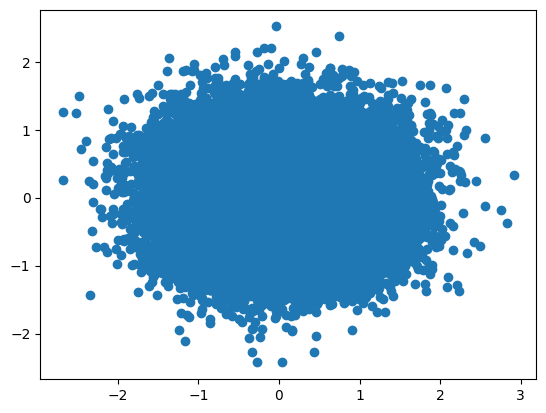

In [17]:
import matplotlib.pyplot as plt
plt.scatter(adata_test.obsm["X_pca"][:,11], adata_test.obsm["X_pca"][:,21])

In [11]:
adata_test.obsm["X_pca"].max()

7.282272957299403

In [13]:
adata_ood.obsm["X_pca"].min()

-6.252831365819759

In [26]:
smiles = list(adata_train.obs["smiles"].cat.categories)
smiles.extend(list(adata_ood.obs["smiles"].cat.categories))

In [27]:
smiles

['C(CC(O)(P(=O)(O)O)P(=O)(O)[O-])CN.O.O.O.[Na+]',
 'C(CS(=O)(=O)[O-])S.[Na+]',
 'C1=C(C(=O)NC(=O)N1)F',
 'C1=C2C3=C(C(=C1O)O)OC(=O)C4=CC(=C(C(=C43)OC2=O)O)O',
 'C1=CC(=C(C(=C1)F)C(=O)N2C(=NC(=N2)NC3=CC=C(C=C3)S(=O)(=O)N)N)F',
 'C1=CC(=C(C2=C1C=CC(=O)O2)O)O',
 'C1=CC(=C(C=C1C(=O)N)[N+](=O)[O-])I',
 'C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O',
 'C1=CC(=CC(=C1)Cl)NC(=O)NC2=NC=C(S2)CCNC3=NC=NC4=C3SC=C4',
 'C1=CC(=CC(=C1)N)C(=O)N',
 'C1=CC(=CC=C1C=CC2=CC(=CC(=C2)O)O)O',
 'C1=CC(=CC=C1S(=O)(=O)N(CC2=C(C=C(C=C2)C3=NOC=N3)F)C(CCC(F)(F)F)C(=O)N)Cl',
 'C1=CC(=CN=C1)C=CC(=O)NCC2=CC=C(C=C2)C(=O)NC3=C(C=CC(=C3)F)N',
 'C1=CC=C(C(=C1)C(=C(N)SC2=CC=C(C=C2)N)C#N)C(F)(F)F',
 'C1=CC=C(C(=C1)N)NC(=O)C2=CC=C(C=C2)CNC(=O)OCC3=CN=CC=C3',
 'C1=CC=C(C(=C1)N)NC(=O)C2=CC=C(C=C2)CNC3=NC=CC(=N3)C4=CN=CC=C4',
 'C1=CC=C(C=C1)CCCC(=O)[O-].[Na+]',
 'C1=CC=C(C=C1)CN2C3=CC=CC=C3C(=C(C2=O)C(=O)NCC(=O)O)O',
 'C1=CC=C(C=C1)CNC(=O)C(=CC2=CC(=C(C=C2)O)O)C#N',
 'C1=CC=C2C(=C1)C(=CN2)CCNC3=CC=C(C=C3)NC4=CC=NC=C4',
 'C1=

In [28]:
len(smiles)

185

In [29]:
with open('/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/smiles.txt', 'w') as f:
    for line in smiles:
        f.write(f"{line}\n")

In [30]:
# Python code to read a text file containing a list and process its contents

def read_list_from_file(file_path):
    """
    Reads a list from a text file where each line represents an item in the list.
    
    :param file_path: str, path to the text file
    :return: list, list of items read from the file
    """
    try:
        with open(file_path, 'r') as file:
            # Read lines from the file and strip any leading/trailing whitespace characters
            lines = [line.strip() for line in file.readlines()]
        return lines
    except FileNotFoundError:
        print(f"Error: The file at {file_path} was not found.")
        return []
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

# Example usage
file_path = '/lustre/groups/ml01/workspace/ot_perturbation/data/sciplex/smiles.txt'  # Replace with the path to your text file
list_from_file = read_list_from_file(file_path)

if list_from_file:
    print("List read from file:")
    for item in list_from_file:
        print(item)
else:
    print("The list is empty or the file could not be read.")


List read from file:
C(CC(O)(P(=O)(O)O)P(=O)(O)[O-])CN.O.O.O.[Na+]
C(CS(=O)(=O)[O-])S.[Na+]
C1=C(C(=O)NC(=O)N1)F
C1=C2C3=C(C(=C1O)O)OC(=O)C4=CC(=C(C(=C43)OC2=O)O)O
C1=CC(=C(C(=C1)F)C(=O)N2C(=NC(=N2)NC3=CC=C(C=C3)S(=O)(=O)N)N)F
C1=CC(=C(C2=C1C=CC(=O)O2)O)O
C1=CC(=C(C=C1C(=O)N)[N+](=O)[O-])I
C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O
C1=CC(=CC(=C1)Cl)NC(=O)NC2=NC=C(S2)CCNC3=NC=NC4=C3SC=C4
C1=CC(=CC(=C1)N)C(=O)N
C1=CC(=CC=C1C=CC2=CC(=CC(=C2)O)O)O
C1=CC(=CC=C1S(=O)(=O)N(CC2=C(C=C(C=C2)C3=NOC=N3)F)C(CCC(F)(F)F)C(=O)N)Cl
C1=CC(=CN=C1)C=CC(=O)NCC2=CC=C(C=C2)C(=O)NC3=C(C=CC(=C3)F)N
C1=CC=C(C(=C1)C(=C(N)SC2=CC=C(C=C2)N)C#N)C(F)(F)F
C1=CC=C(C(=C1)N)NC(=O)C2=CC=C(C=C2)CNC(=O)OCC3=CN=CC=C3
C1=CC=C(C(=C1)N)NC(=O)C2=CC=C(C=C2)CNC3=NC=CC(=N3)C4=CN=CC=C4
C1=CC=C(C=C1)CCCC(=O)[O-].[Na+]
C1=CC=C(C=C1)CN2C3=CC=CC=C3C(=C(C2=O)C(=O)NCC(=O)O)O
C1=CC=C(C=C1)CNC(=O)C(=CC2=CC(=C(C=C2)O)O)C#N
C1=CC=C2C(=C1)C(=CN2)CCNC3=CC=C(C=C3)NC4=CC=NC=C4
C1=CC=C2C(=C1)C(=O)N(C2=O)C(CC3=CNC4=CC=CC=C43)C(=O)O
C1=CC=C2C(

In [31]:
len(list_from_file)

185